In [ ]:
import sys
sys.version
sys.version_info
import platform
print(platform.python_version())

3.6.8


# Importing Kearas

In [ ]:
import tensorflow
import keras

In [ ]:
print('tensorflow: %s' % tensorflow.__version__)

tensorflow: 1.14.0


In [ ]:
print('keras: %s' % keras.__version__)

keras: 2.2.5


# Importing all nessassary packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, LSTM, Dropout, advanced_activations
from keras.callbacks import ModelCheckpoint, TensorBoard
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,recall_score,precision_score,accuracy_score,f1_score
%matplotlib inline
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/open?id=1fOJxutKm8ll7c0U8afbVR2br8rLwKgN8'

In [ ]:
fluff, id = link.split('=')
print (id)

1fOJxutKm8ll7c0U8afbVR2br8rLwKgN8


In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('diabetes.csv')  
df = pd.read_csv('diabetes.csv')

W0831 07:46:40.234086 140219949373312 __init__.py:44] file_cache is unavailable when using oauth2client >= 4.0.0 or google-auth
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import Lock

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
import pandas_profiling as pf
eda=pf.ProfileReport(df)
eda.to_file("df.html")
eda

Number of variables,9
Number of observations,768
Total Missing (%),0.0%
Total size in memory,54.1 KiB
Average record size in memory,72.1 B
Numeric,8
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


As per correlation Glucose,BMI and Age has high positive correlation to the outome variable

In [ ]:
print ('Overall data summary')
df.describe()
 
print ('Counts of Labels')
df.groupby("Outcome").size()
 

Overall data summary
Counts of Labels


Outcome
0    500
1    268
dtype: int64

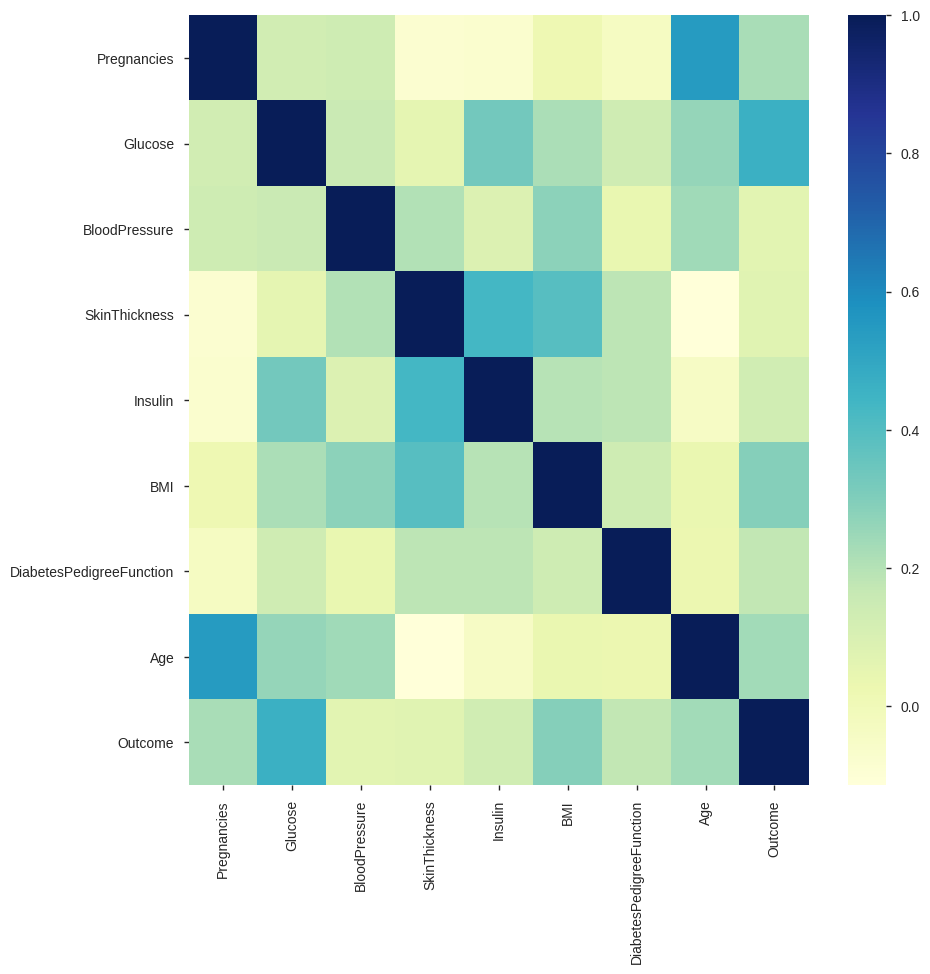

In [ ]:
x = df.corr()
x
plt.subplots(figsize=(10,10))
sns.heatmap(x,cmap="YlGnBu")
plt.show();

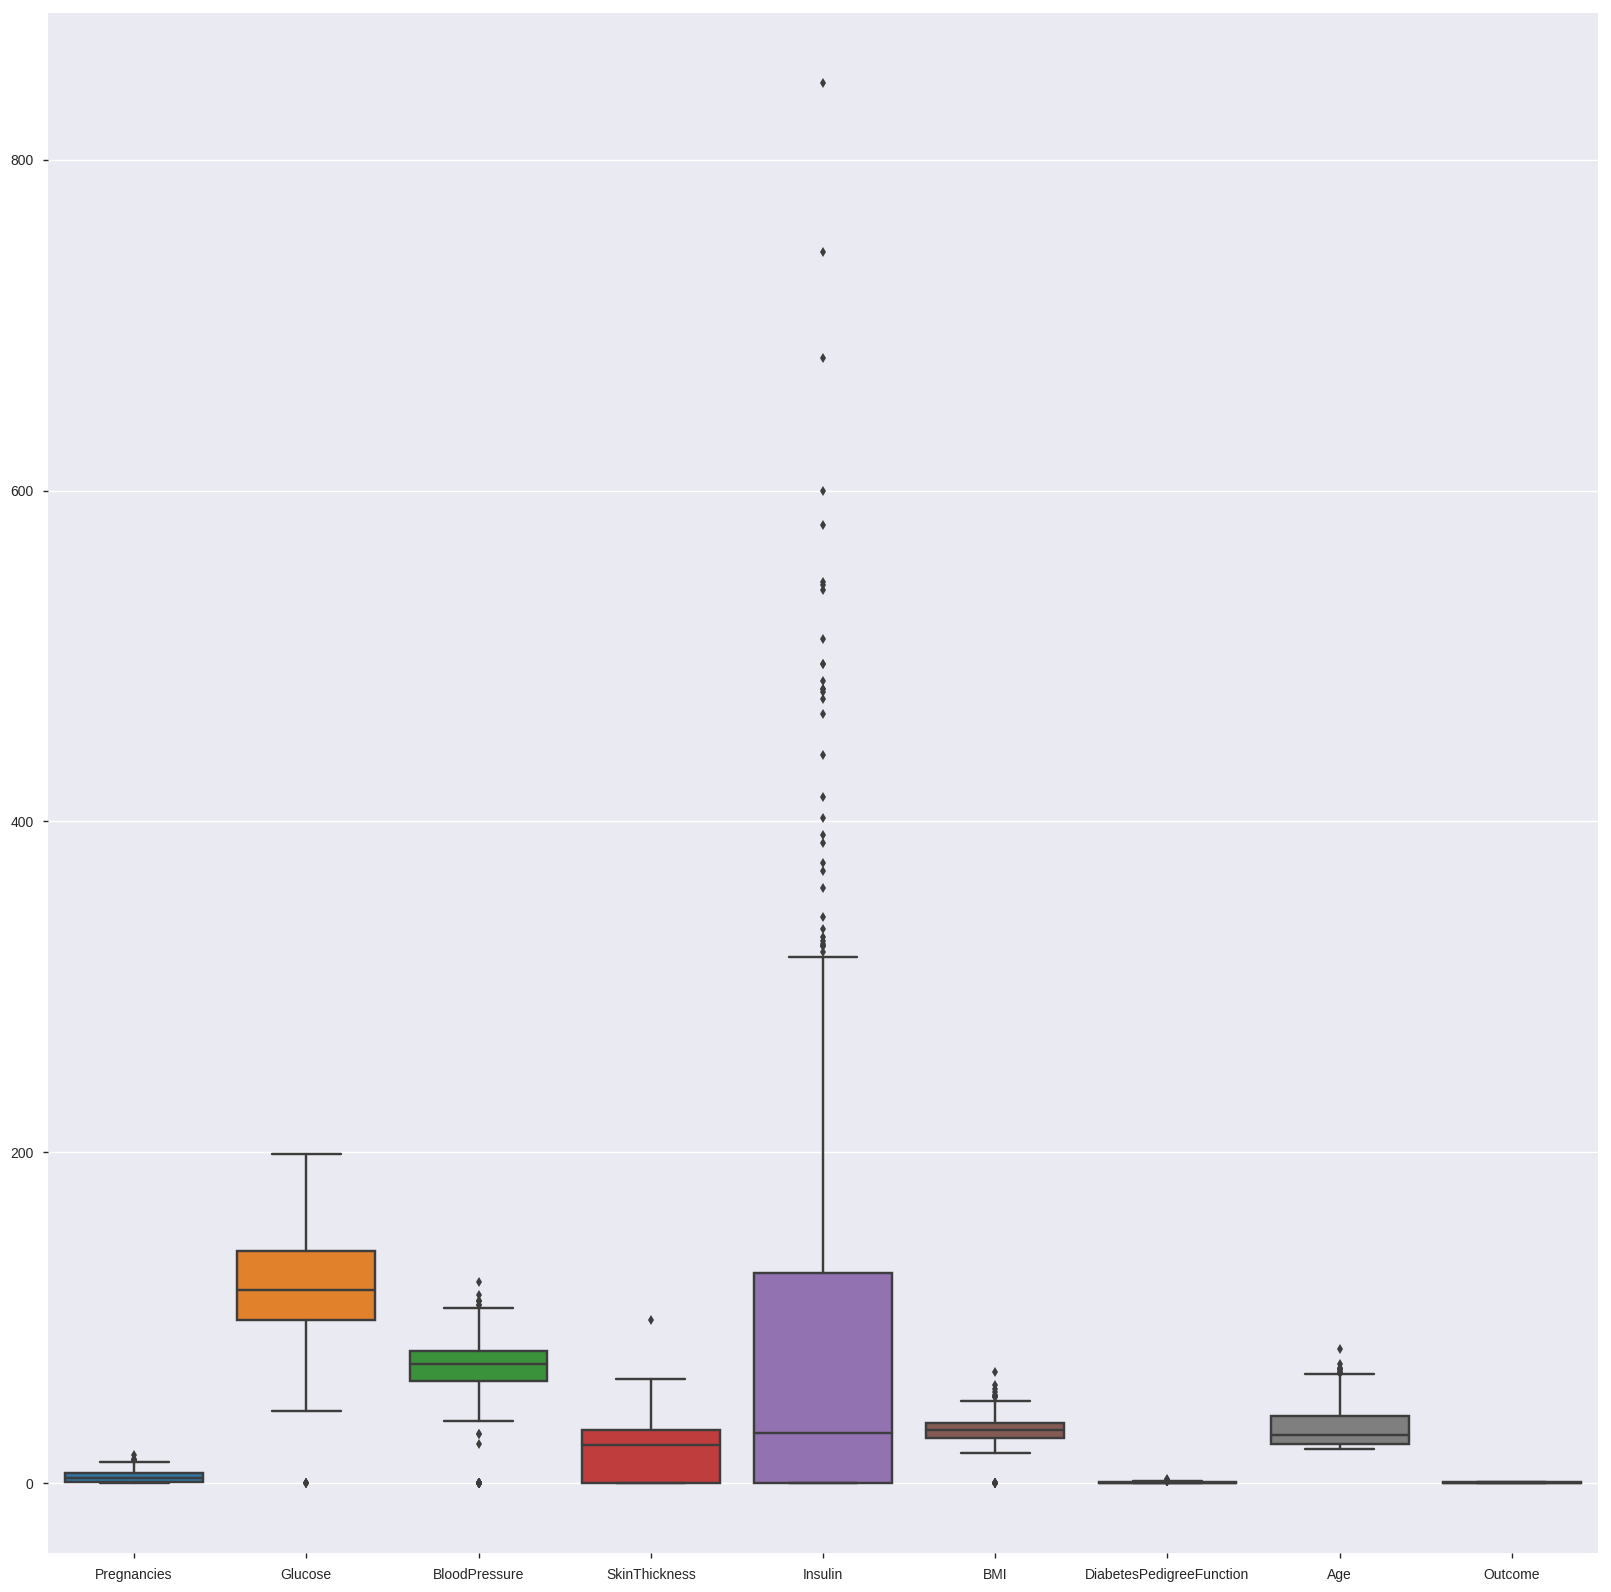

In [ ]:
plt.subplots(figsize=(20,20))
sns.boxplot(data=df)
plt.show();

In [ ]:
Y = df.iloc[:,8]
X= df.iloc[:,0:8]
std = StandardScaler()
X_Features= std.fit_transform(X)
# Create train and test data 75% and 25% split
train_x, test_x, train_y, test_y = train_test_split(X_Features, Y, test_size=0.25, random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape
type(train_x)

numpy.ndarray